In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "Unemployment in India.csv"
data = pd.read_csv(file_path)

In [3]:
# Display basic info
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows of Dataset:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

First 5 Rows of Dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1

In [4]:
print("\nMissing Values in Each Column:") # Check for missing values
print(data.isnull().sum())



Missing Values in Each Column:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [5]:
# Remove rows with missing values
data = data.dropna()

In [8]:
# Standardize region names
data['Region'] = data['Region'].str.lower().str.strip()

In [16]:
# Display the cleaned dataset

print("\nCleaned Dataset Preview:")
print(data.head())


Cleaned Dataset Preview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  andhra pradesh   31-05-2019    Monthly                              3.65   
1  andhra pradesh   30-06-2019    Monthly                              3.05   
2  andhra pradesh   31-07-2019    Monthly                              3.75   
3  andhra pradesh   31-08-2019    Monthly                              3.32   
4  andhra pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [19]:
data.columns = data.columns.str.strip()

In [20]:
data = data.drop(columns=['Frequency'])

In [21]:
print(data.head())

           Region         Date  Estimated Unemployment Rate (%)  \
0  andhra pradesh   31-05-2019                             3.65   
1  andhra pradesh   30-06-2019                             3.05   
2  andhra pradesh   31-07-2019                             3.75   
3  andhra pradesh   31-08-2019                             3.32   
4  andhra pradesh   30-09-2019                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [22]:
from sklearn.preprocessing import LabelEncoder

# Strip any leading/trailing spaces in column names (optional but recommended)
data.columns = data.columns.str.strip()

# Encoding the 'Area' column (Rural/Urban) using LabelEncoder
encoder = LabelEncoder()
data['Area'] = encoder.fit_transform(data['Area'])

# One-hot encoding for the 'Region' column (multiple categories)
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

# Display the dataset after encoding
print(data.head())

          Date  Estimated Unemployment Rate (%)  Estimated Employed  \
0   31-05-2019                             3.65          11999139.0   
1   30-06-2019                             3.05          11755881.0   
2   31-07-2019                             3.75          12086707.0   
3   31-08-2019                             3.32          12285693.0   
4   30-09-2019                             5.17          12256762.0   

   Estimated Labour Participation Rate (%)  Area  Region_assam  Region_bihar  \
0                                    43.24     0         False         False   
1                                    42.05     0         False         False   
2                                    43.50     0         False         False   
3                                    43.97     0         False         False   
4                                    44.68     0         False         False   

   Region_chandigarh  Region_chhattisgarh  Region_delhi  ...  \
0              False        

0   2019-05-31
1   2019-06-30
2   2019-07-31
3   2019-08-31
4   2019-09-30
Name: Date, dtype: datetime64[ns]


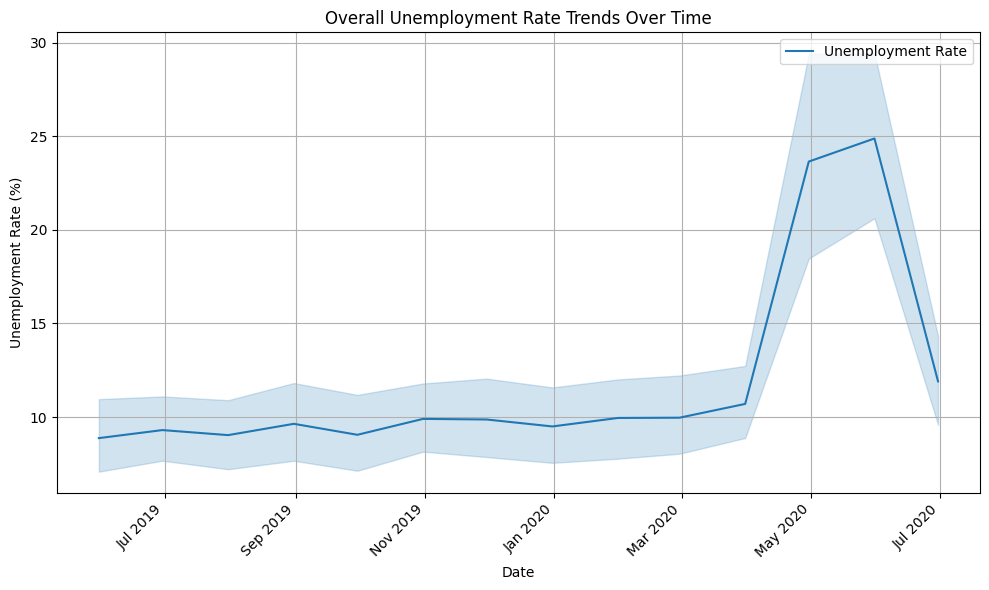

In [26]:
# --- Exploratory Data Analysis (EDA) ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # 'errors=coerce' will turn invalid dates into NaT

# Check for any invalid date values after conversion
print(data['Date'].head())

# Plotting the overall unemployment trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data, label="Unemployment Rate")

# Title and labels
plt.title("Overall Unemployment Rate Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format the date labels to show month and year
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

# Add grid and legend
plt.legend()
plt.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-36-03402a3f0561>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg, y=region_avg.index, palette="viridis")


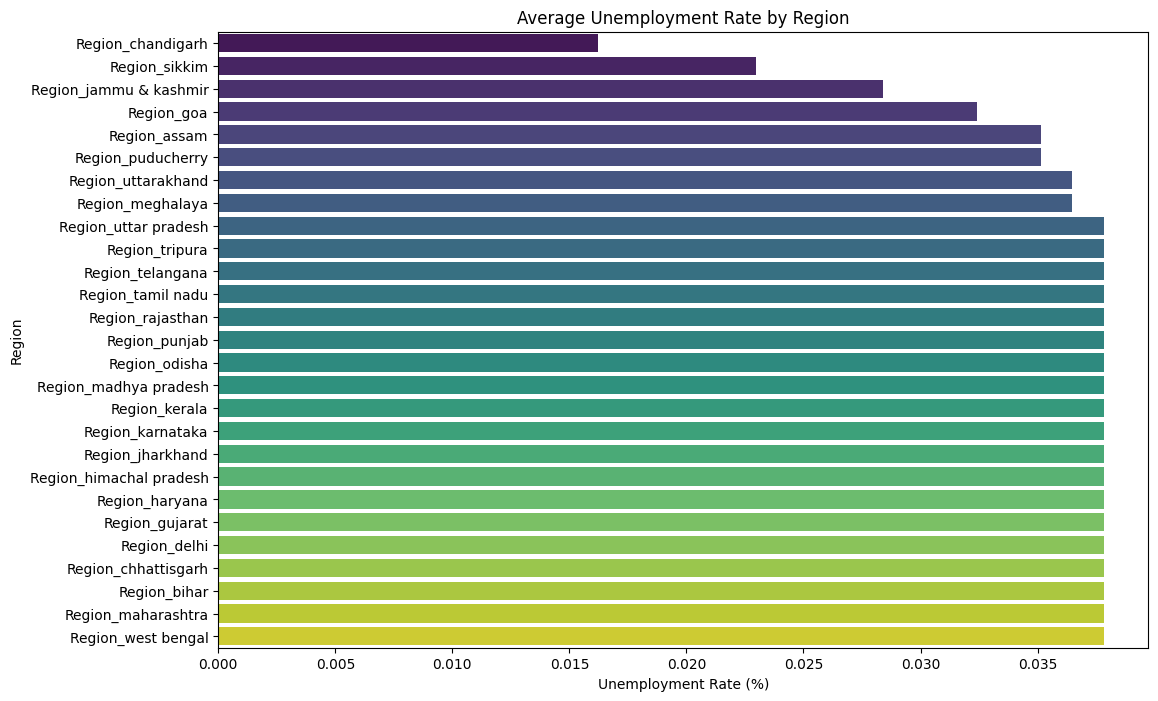

In [36]:
# 2. Average unemployment rates by region (using the one-hot encoded columns)
# We need to group by the one-hot encoded columns instead of the 'Region' column itself
# Calculate the average unemployment rate for each region (one-hot encoded columns)
region_avg = data.filter(regex='^Region_').mean().sort_values()

# Plotting the average unemployment rate by region
plt.figure(figsize=(12, 8))
sns.barplot(x=region_avg, y=region_avg.index, palette="viridis")
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.show()






<ipython-input-34-4f0598a3e074>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=data, palette="Set2")


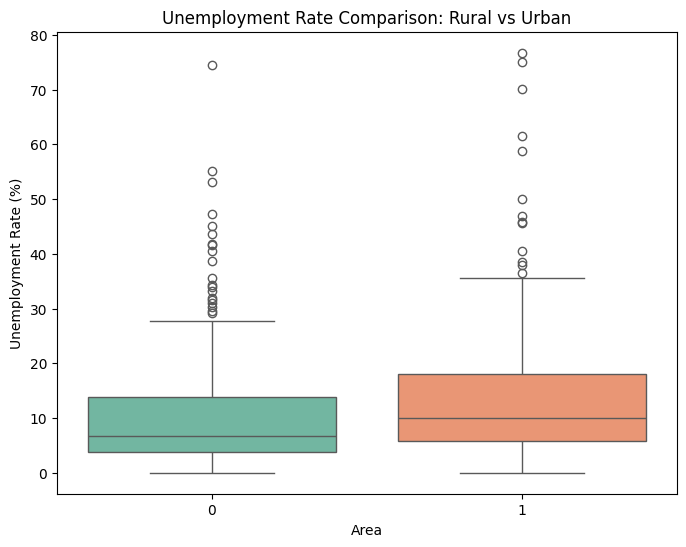

In [34]:
# 3. Rural vs Urban comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=data, palette="Set2")
plt.title("Unemployment Rate Comparison: Rural vs Urban")
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.show()

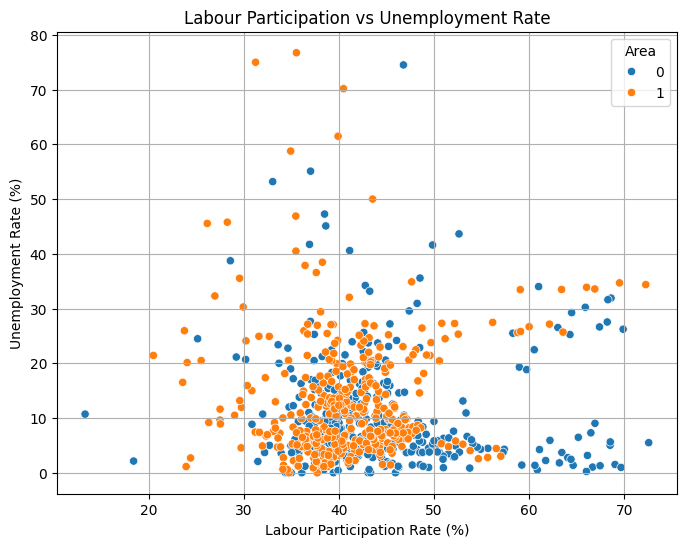

In [35]:

# 4. Correlation between unemployment rate and labour participation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', hue='Area', data=data)
plt.title("Labour Participation vs Unemployment Rate")
plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
plt.show()

In [37]:
# --- Machine Learning Model: Linear Regression ---

# Select features and target variable
X = data[['Estimated Labour Participation Rate (%)', 'Estimated Employed']]
y = data['Estimated Unemployment Rate (%)']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print("R-squared:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))

# Save predictions for review
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredictions:")
print(predictions.head())

# --- Save Cleaned Data and Model ---
# Save the cleaned dataset
data.to_csv("Cleaned_Unemployment_Data.csv", index=False)

# Save the trained model
joblib.dump(model, "unemployment_model.pkl")


Model Evaluation:
R-squared: 0.03938840314253944
Root Mean Squared Error: 11.793012572407992

Predictions:
     Actual  Predicted
120   25.64  13.405464
430    6.29  13.399383
334    5.74  13.081305
350    6.78   7.041626
426    7.22  13.437784


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


['unemployment_model.pkl']

In [38]:
# --- Predicting New Test Cases ---
# Example new test cases (change these values as per actual test cases you want to predict)
new_data = [[55, 30000],  # Test case 1: Example features for prediction
            [60, 35000]]  # Test case 2: Another example

# Predict the unemployment rate for the new test cases
new_predictions = model.predict(new_data)

# Display predictions for new test cases
print("\nPredictions for New Test Cases:")
for i, prediction in enumerate(new_predictions, 1):
    print(f"Test Case {i} Predicted Unemployment Rate: {prediction:.4f}%")


Predictions for New Test Cases:
Test Case 1 Predicted Unemployment Rate: 14.4408%
Test Case 2 Predicted Unemployment Rate: 14.6569%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


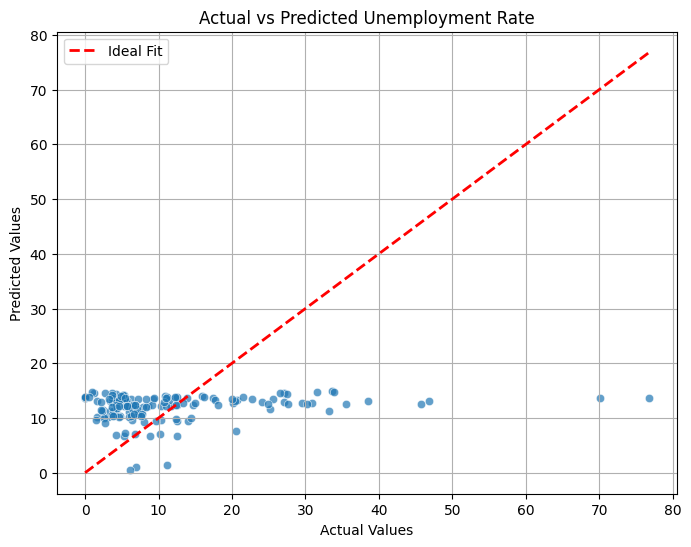

In [39]:
# Visualize Actual vs Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label="Ideal Fit")
plt.title("Actual vs Predicted Unemployment Rate")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()


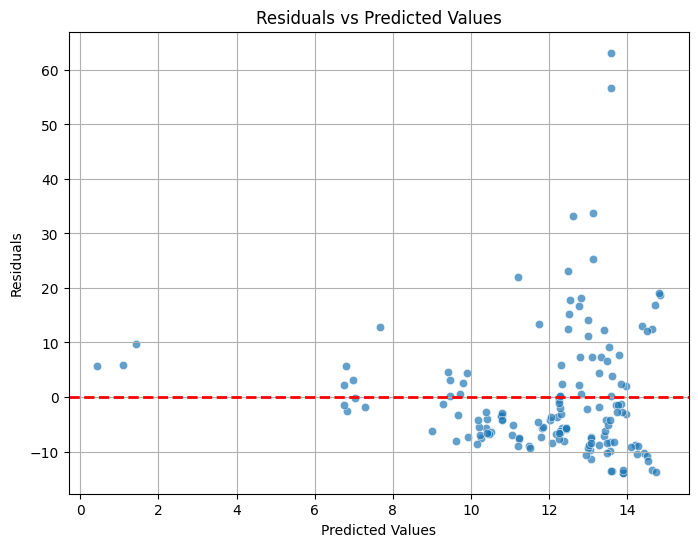

In [40]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()


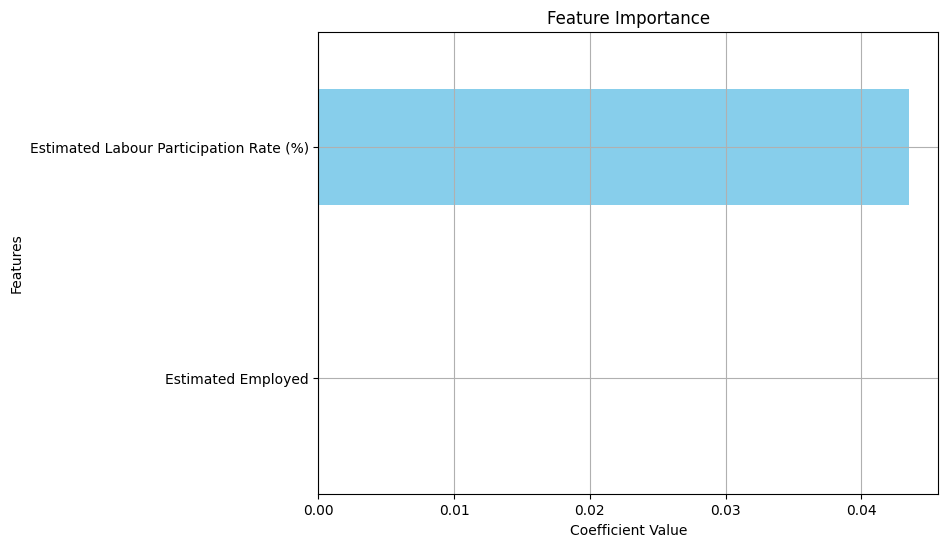

In [41]:
# Feature Importance (Coefficients)
coefficients = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(8, 6))
coefficients.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid()
plt.show()


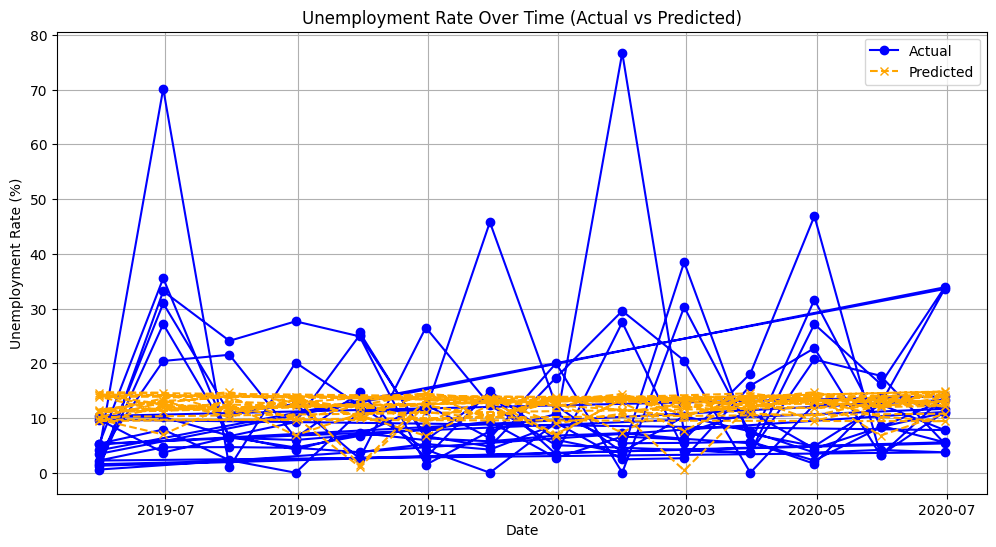

In [42]:
plt.figure(figsize=(12, 6))  ## time series visualization
plt.plot(data['Date'][-len(y_test):], y_test, label="Actual", color="blue", marker='o')
plt.plot(data['Date'][-len(y_test):], y_pred, label="Predicted", color="orange", linestyle="--", marker='x')
plt.title("Unemployment Rate Over Time (Actual vs Predicted)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid()
plt.show()


In [43]:
import os

# List files in the current directory
print("Files in the current directory:")
print(os.listdir())

Files in the current directory:
['.config', 'Cleaned_Unemployment_Data.csv', 'Unemployment in India.csv', 'unemployment_model.pkl', 'sample_data']
